(<AxesSubplot:>,
 ([], []),
 ([], []))

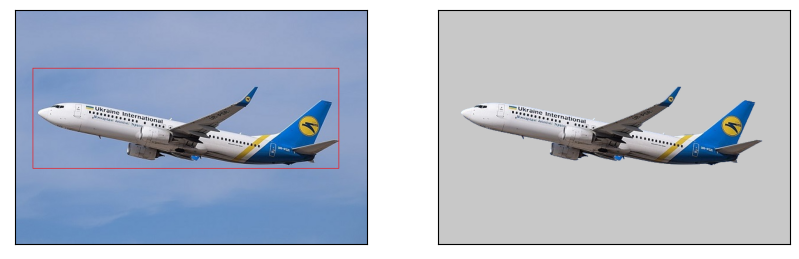

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('airplane.jpg', cv.IMREAD_COLOR)

mask = np.zeros((img.shape[0],img.shape[1]),np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (30,100,550,270)

cv.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

objects_mask = np.where((mask==1)|(mask==3),1,0).astype('uint8')

rect_img = img.copy()
cv.rectangle(rect_img, rect[0:2], rect[2:], [0,0,255])

res = img * objects_mask[:,:,np.newaxis] + 200 * (1 - objects_mask[:,:,np.newaxis])

plt.figure(figsize=(10,10))
plt.subplot(1,2,1), plt.imshow(rect_img[:,:,::-1]), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(res[:,:,::-1]), plt.xticks([]), plt.yticks([])
